In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
DIR = "../build/slime/out"

results = []

for file in os.listdir(DIR):
    if file.endswith(".out"):
        with open(f"{DIR}/{file}", "r") as f:
            for line in list(f.readlines()):
                if line[0] == "-":
                    computer_type = file.split("_")[0]
                    w, h = file.split("_")[1].split(".")[:2]
                    w, h = int(w), int(h)
                    kernel = line.split(": ")[1].split(",")[0]
                    benchmark = float(line.split(": ")[-1])
                    results.append({ "kernel_type" : kernel, "n_pixels" : w * h, "width" : w, "height" : h, "duration" : benchmark })

results_df = pd.DataFrame(results)                    

In [3]:
results_df.kernel_type.value_counts()

sensor_stage_kernel             50
motor_stage_kernel              50
diffusion_kernel                50
decay_chemoattractant_kernel    50
sensory_stage_cpu               50
motor_stage_cpu                 50
diffusion_cpu                   50
decay_chemoattractant_cpu       50
Name: kernel_type, dtype: int64

In [ ]:
LOAD = False
if LOAD:
    results_pivot_df = pd.read_csv("results.csv").set_index("n")
else:
    results_pivot_df = results_df.groupby(["n_pixels", "kernel_type"]).duration.mean().to_frame().reset_index().rename(columns={0:"duration"}).pivot(index="n_pixels", columns="kernel_type", values="duration")
results_pivot_df

kernel_type,decay_chemoattractant_cpu,decay_chemoattractant_kernel,diffusion_cpu,diffusion_kernel,motor_stage_cpu,motor_stage_kernel,sensor_stage_kernel,sensory_stage_cpu
n_pixels,,,,,,,,
7500,0.055605,0.033811,0.428598,0.058899,0.198314,0.007504,0.005878,0.476688
30000,0.143564,0.036307,1.141349,0.059443,0.522894,0.008403,0.006470,1.242348
120000,0.571846,0.047312,4.516103,0.063056,2.106021,0.043299,0.027088,5.022407
480000,2.270232,0.098160,17.883970,0.082458,8.672424,0.476787,0.177718,21.311713
1080000,5.050252,0.184765,39.735055,0.120730,19.805798,1.316938,0.589126,50.465611


In [5]:
cols = results_pivot_df.columns.tolist()
col_pairs = []
for i in range(0, len(cols), 2):
    col_a, col_b = cols[i:i+2]
    if col_a.find("cpu") != -1:
        col_cpu, col_gpu = col_a, col_b
    else:
        col_cpu, col_gpu = col_b, col_a
    print(col_cpu, col_gpu)
    col_pairs.append((col_cpu, col_gpu))

decay_chemoattractant_cpu decay_chemoattractant_kernel
diffusion_cpu diffusion_kernel
motor_stage_cpu motor_stage_kernel
sensory_stage_cpu sensor_stage_kernel


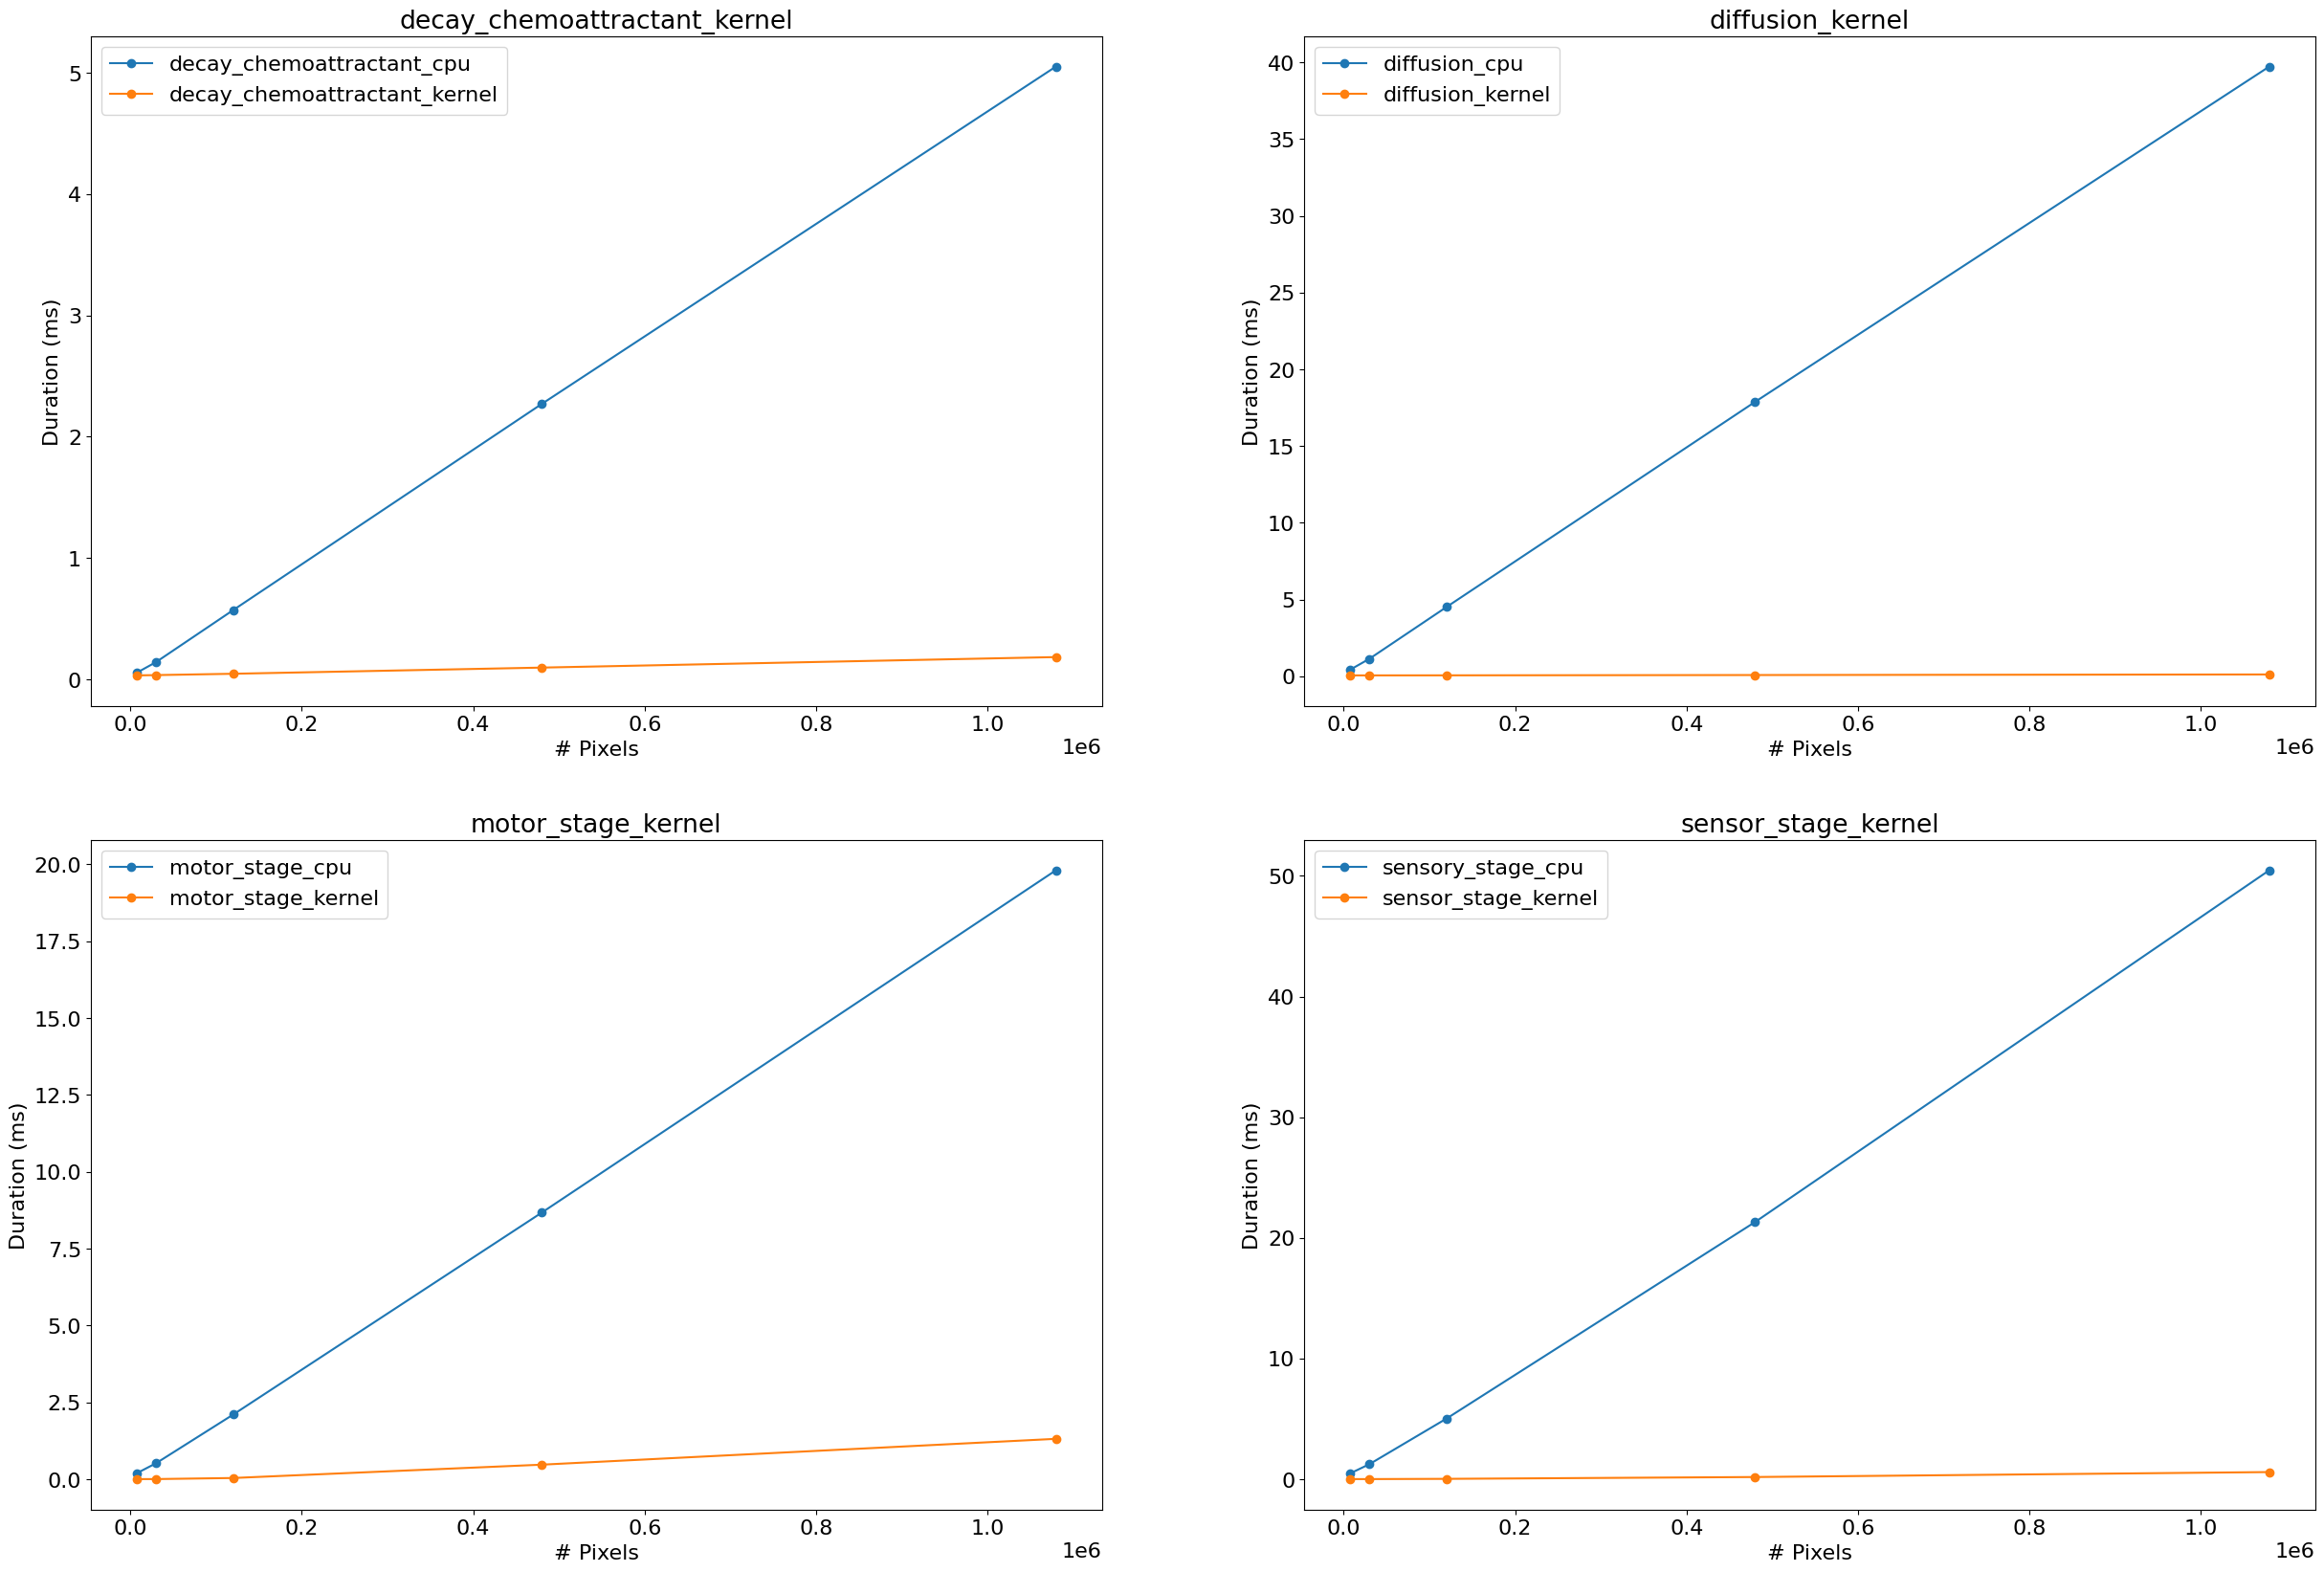

In [6]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(2, 2, figsize=(30, 20))
for ax, (col_cpu, col_gpu) in zip(np.ravel(axes), col_pairs):
    ax.plot(results_pivot_df.index, results_pivot_df[col_cpu], "-o", label=col_cpu)
    ax.plot(results_pivot_df.index, results_pivot_df[col_gpu], "-o", label=col_gpu)
    ax.set_xlabel("# Pixels")
    ax.set_ylabel("Duration (ms)")
    ax.set_title(col_gpu)
    ax.legend()
plt.show()

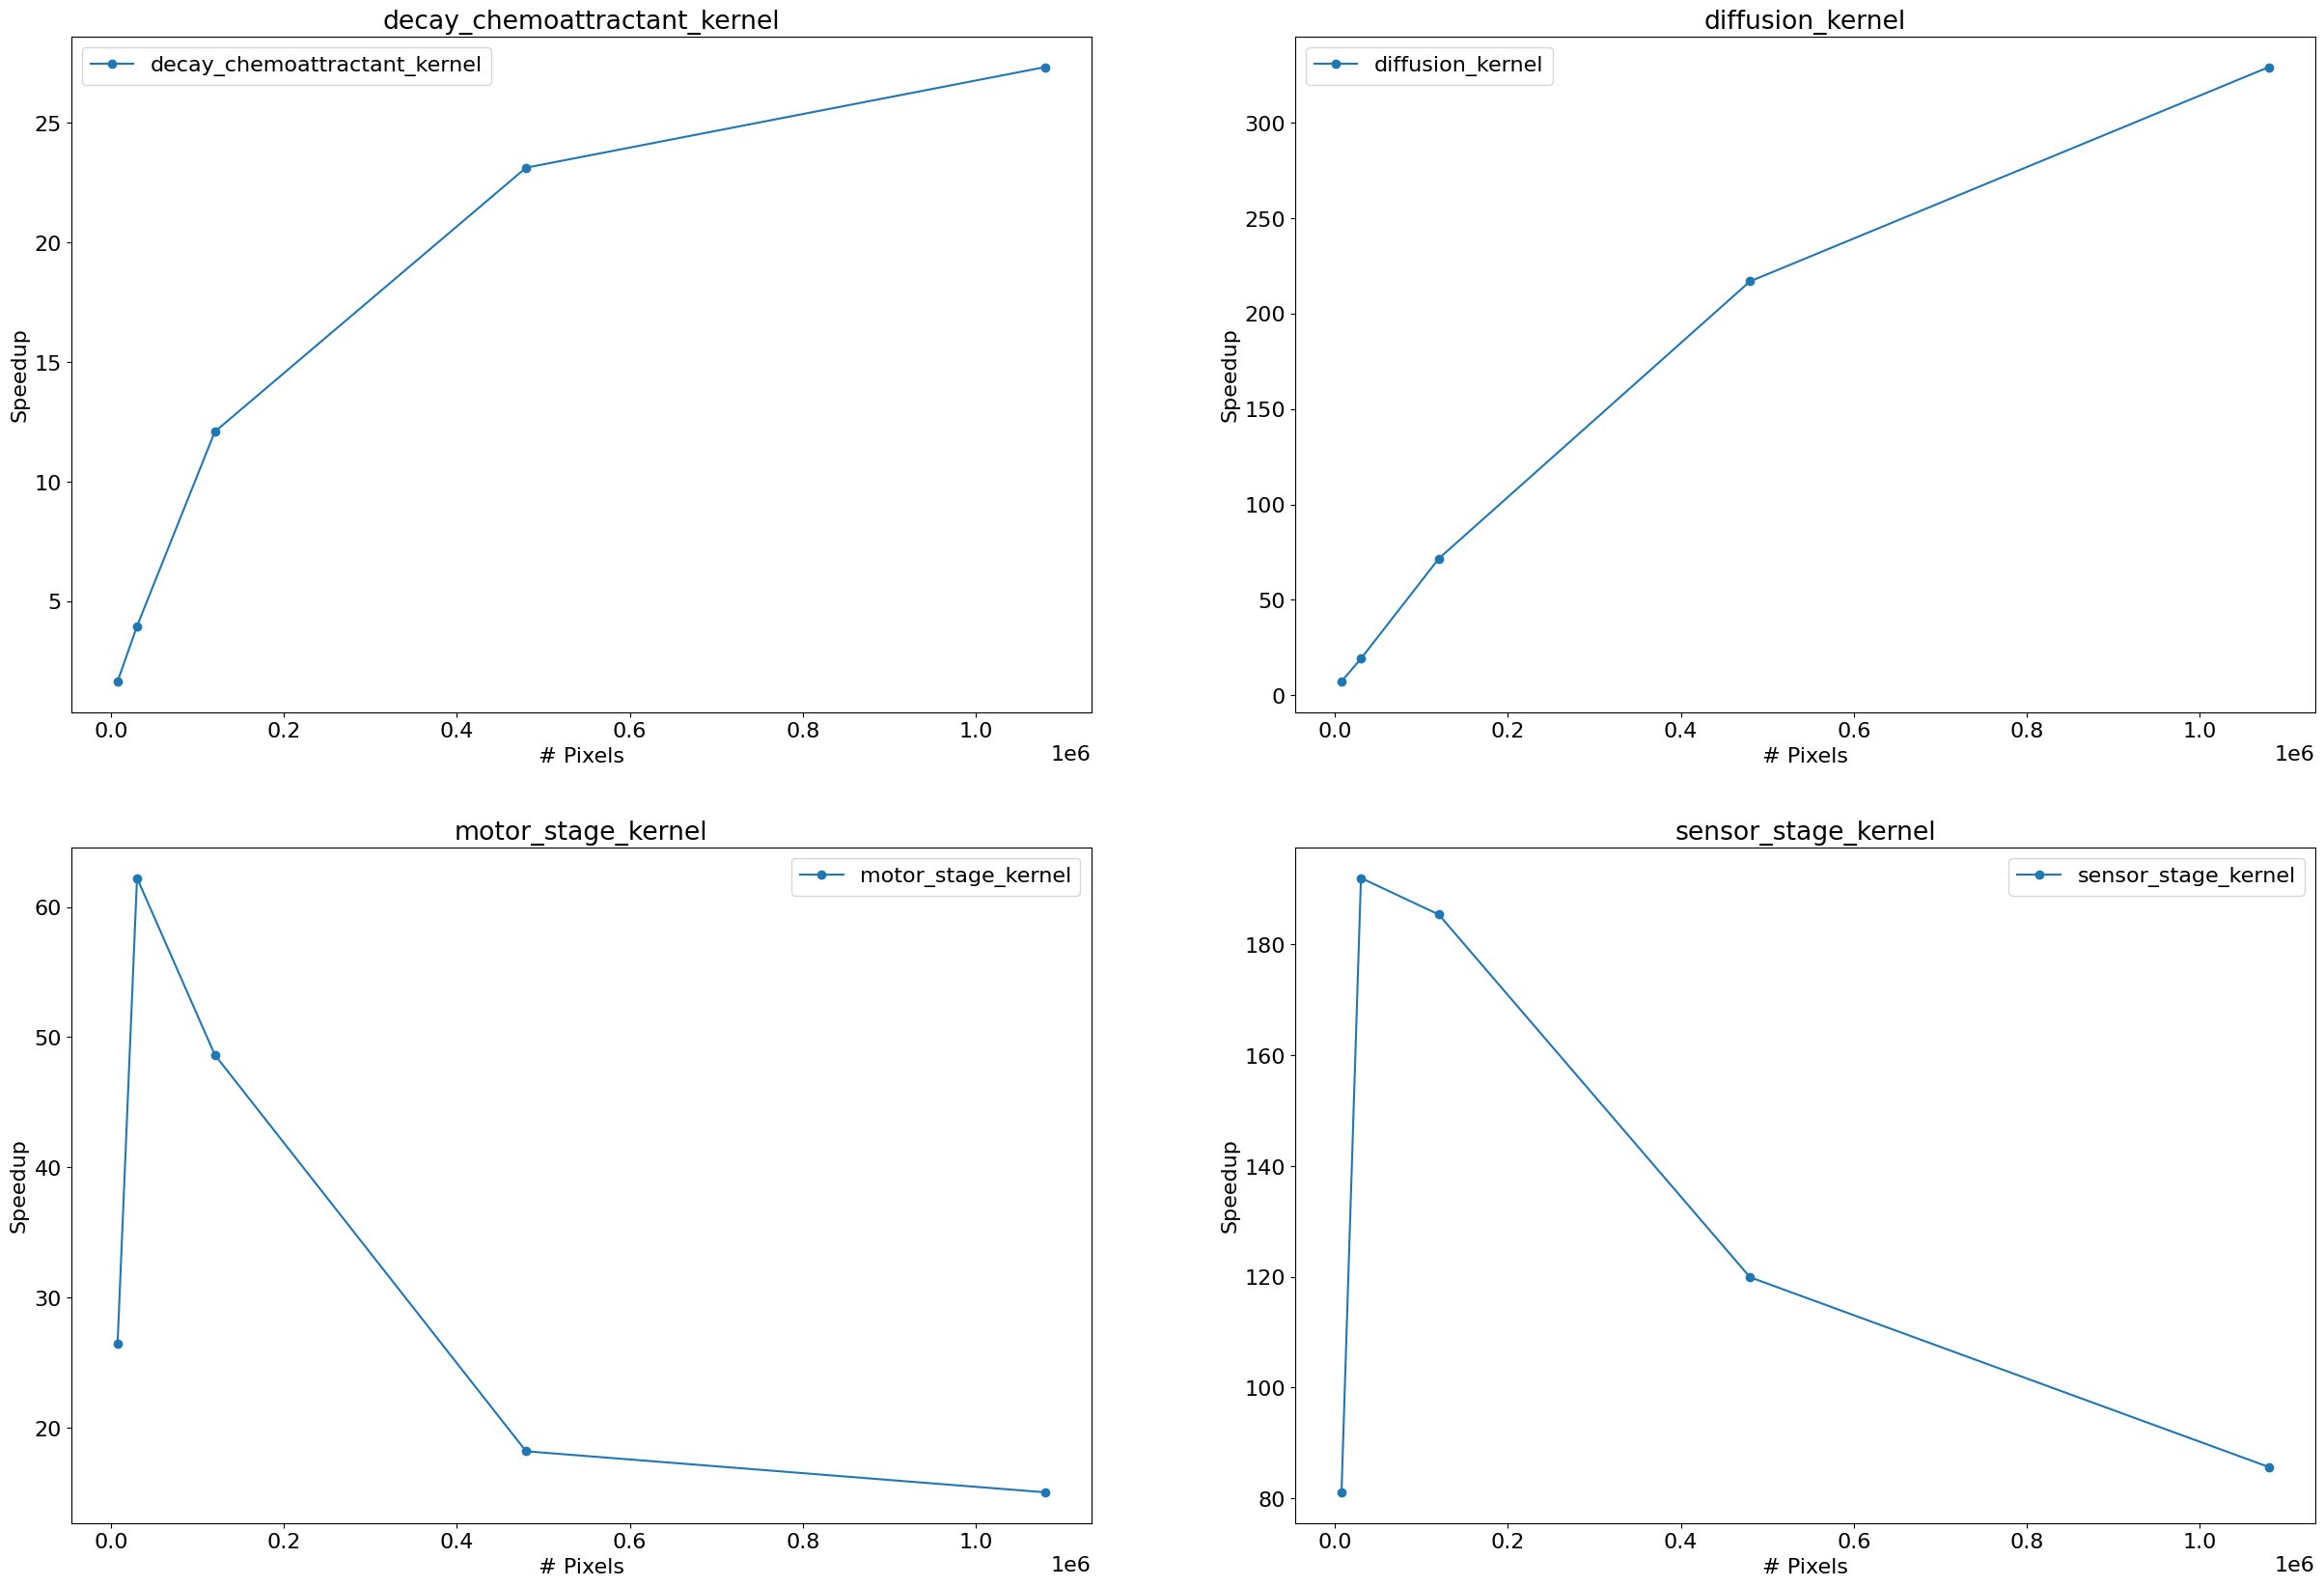

In [7]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(2, 2, figsize=(30, 20))
for ax, (col_cpu, col_gpu) in zip(np.ravel(axes), col_pairs):
    speedup = results_pivot_df[col_cpu] / results_pivot_df[col_gpu]
    ax.plot(results_pivot_df.index, speedup, "-o", label=col_gpu)
    ax.set_xlabel("# Pixels")
    ax.set_ylabel("Speedup")
    ax.set_title(col_gpu)
    ax.legend()
plt.show()